#1.引入模組

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, model_selection, tree, metrics, preprocessing
import numpy as np
%matplotlib inline

In [2]:
row_data=pd.read_csv('winequality-red.csv')
row_data=pd.DataFrame(row_data)
X = row_data.iloc[:, :11+1]
y= row_data[['quality category']]

#2.模型建構

In [3]:
X=X.to_numpy()
X.shape

(1599, 12)

In [4]:
le = preprocessing.LabelEncoder()
class_ls = le.fit_transform(y['quality category'])

new_y = pd.DataFrame(class_ls, columns = ['quality category'])
y=new_y.to_numpy().ravel()

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [6]:
#rfc=RandomForestClassifier(n_estimators=100)
rfc=RandomForestClassifier(n_estimators=100,n_jobs = -1,random_state =50, min_samples_leaf = 10)
rfc.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=10, n_jobs=-1, random_state=50)

In [7]:
y_predict=rfc.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
y_predict_all=rfc.predict(X)

In [9]:
rfc.score(X_test,y_test)

0.9479166666666666

In [10]:
cm = metrics.confusion_matrix(y_true=y, y_pred=y_predict_all)
cm

array([[1319,    0,    0],
       [   0,  217,    0],
       [  54,    0,    9]], dtype=int64)

In [11]:
import seaborn as sns

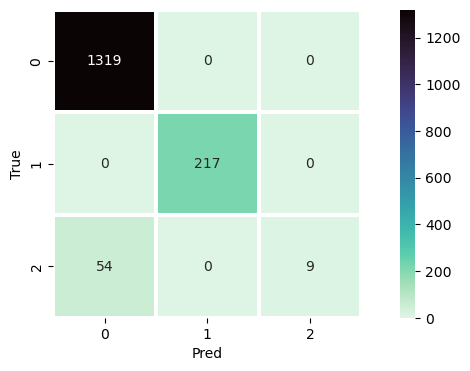

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize=(10, 4))
#可替換的色調選項：cmap='copper', 'copper_r', 'mako_r', 'Reds', 'rocket_r'
sns.heatmap(cm, square=True, annot=True, fmt='d', cmap='mako_r', linecolor='white', linewidths=1.5, cbar=True)
plt.xlabel('Pred')
plt.ylabel('True')
plt.show()

plt.savefig('RandomForest.png')

# 3.Feature Importance

In [13]:
imp=rfc.feature_importances_

In [14]:
imp

array([0.01926875, 0.04500024, 0.02237043, 0.01117705, 0.01006752,
       0.01054856, 0.02599401, 0.02099087, 0.00897394, 0.04884243,
       0.07575327, 0.70101293])

In [15]:
names=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']
names

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

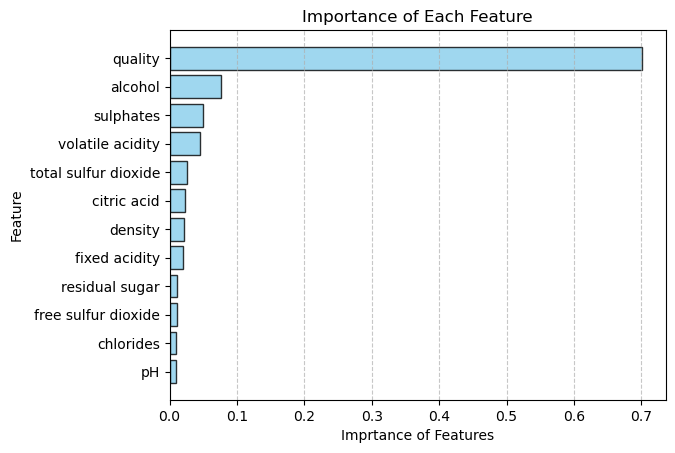

In [16]:
zip(imp,names)
imp, names = zip(*sorted(zip(imp,names)))
# plt.barh(range(len(names)),imp,align="center")
plt.barh(range(len(names)), imp, align="center", color="skyblue", edgecolor="black", alpha=0.8)
plt.yticks(range(len(names)),names)
plt.xlabel("Imprtance of Features")
plt.ylabel("Feature")
plt.title("Importance of Each Feature")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()